In [2]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# loading the dataset
df = pd.read_csv("dataset/Position_Salaries.csv")
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [4]:
# building and training a linear regression model on the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y) 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [5]:
# transforming the feature into polynomial terms
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X)
print(X_poly)

[[1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00]
 [1.0000e+00 2.0000e+00 4.0000e+00 8.0000e+00 1.6000e+01 3.2000e+01]
 [1.0000e+00 3.0000e+00 9.0000e+00 2.7000e+01 8.1000e+01 2.4300e+02]
 [1.0000e+00 4.0000e+00 1.6000e+01 6.4000e+01 2.5600e+02 1.0240e+03]
 [1.0000e+00 5.0000e+00 2.5000e+01 1.2500e+02 6.2500e+02 3.1250e+03]
 [1.0000e+00 6.0000e+00 3.6000e+01 2.1600e+02 1.2960e+03 7.7760e+03]
 [1.0000e+00 7.0000e+00 4.9000e+01 3.4300e+02 2.4010e+03 1.6807e+04]
 [1.0000e+00 8.0000e+00 6.4000e+01 5.1200e+02 4.0960e+03 3.2768e+04]
 [1.0000e+00 9.0000e+00 8.1000e+01 7.2900e+02 6.5610e+03 5.9049e+04]
 [1.0000e+00 1.0000e+01 1.0000e+02 1.0000e+03 1.0000e+04 1.0000e+05]]


In [8]:
# building and training another linear regression model on the transformed dataset
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
# predicting the outputs using both regression models
print(f"Actual value : {y[4]}")
print(f"Linear Regression : {lin_reg.predict([[5]])}")
print(f"Polynomial Regression : {lin_reg_2.predict(poly_reg.fit_transform([[5]]))}")

Actual value : 110000
Linear Regression : [209060.60606061]
Polynomial Regression : [112263.40326412]


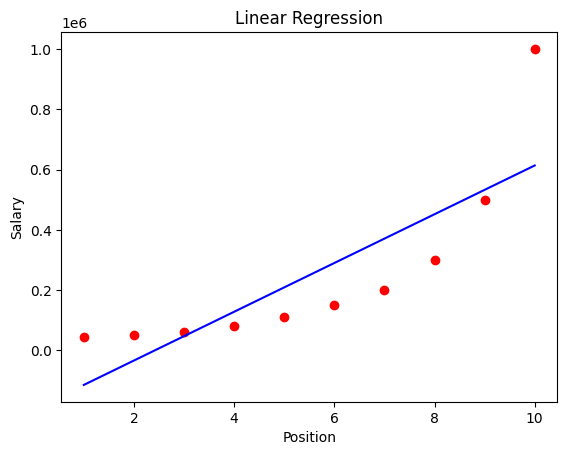

In [15]:
# visualizing the linear regression model
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title("Linear Regression")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

/tmp/ipykernel_1679/479292864.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


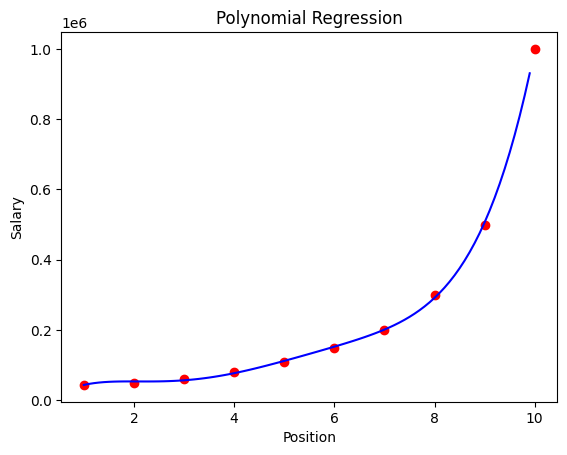

In [19]:
# visualizing the polynomial regression model
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title("Polynomial Regression")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

In [22]:
# finding r2 score
from sklearn.metrics import r2_score
print(f"R2 score : {r2_score(y, lin_reg_2.predict(X_poly))}")

R2 score : 0.9997969027099755
